# Tabular Methods Comparison

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym

from rlforge.agents.tabular import SarsaAgent, QAgent, ExpectedSarsaAgent
from rlforge.experiments import ExperimentRunner

In [4]:
env = gym.make("CliffWalking-v1")
sarsa_agent = SarsaAgent(step_size=0.5,
                         discount=1,
                         num_states=env.observation_space.n,
                         num_actions=env.action_space.n,
                         epsilon=0.1)
q_agent = QAgent(step_size=0.5,
                 discount=1,
                 num_states=env.observation_space.n,
                 num_actions=env.action_space.n,
                 epsilon=0.1)
expected_sarsa_agent = ExpectedSarsaAgent(step_size=0.5,
                                          discount=1,
                                          num_states=env.observation_space.n,
                                          num_actions=env.action_space.n,
                                          epsilon=0.1)

In [5]:
algorithms = ["SARSA", "Q Learning", "Expected SARSA"]
agents = [sarsa_agent, q_agent, expected_sarsa_agent]

rewards_list = []
steps_per_episode_list = []
results_by_agent = {}

for name, agent in zip(algorithms, agents):
    runner = ExperimentRunner(env, agent)

    results = runner.run_episodic(
        num_runs=100,
        num_episodes=500,
        max_steps_per_episode=10000
    )

    # Store results for later analysis
    rewards_list.append(results["rewards"])
    steps_per_episode_list.append(results["steps"])
    results_by_agent[name] = results

    # Optional: print a quick summary for each agent
    print(f"\n{name} Summary:")
    runner.summary(last_n=10)


SARSA Summary:
 Experiment Summary (Episodic)
Runs: 100
Average runtime per run: 0.333 seconds
Episodes per run: 500
First episode mean reward: -1785.730
Last episode mean reward: -24.600
Overall mean reward: -36.155
Mean reward (last 10 episodes): -27.730
First episode mean steps: 498.7
Last episode mean steps: 23.6
Overall mean steps: 26.2



Q Learning Summary:
 Experiment Summary (Episodic)
Runs: 100
Average runtime per run: 0.318 seconds
Episodes per run: 500
First episode mean reward: -1790.040
Last episode mean reward: -51.500
Overall mean reward: -56.129
Mean reward (last 10 episodes): -49.335
First episode mean steps: 486.2
Last episode mean steps: 16.9
Overall mean steps: 20.7



Expected SARSA Summary:
 Experiment Summary (Episodic)
Runs: 100
Average runtime per run: 0.541 seconds
Episodes per run: 500
First episode mean reward: -1539.870
Last episode mean reward: -22.180
Overall mean reward: -28.349
Mean reward (last 10 episodes): -20.675
First episode mean steps: 430.1
Last episode mean steps: 17.2
Overall mean steps: 20.8


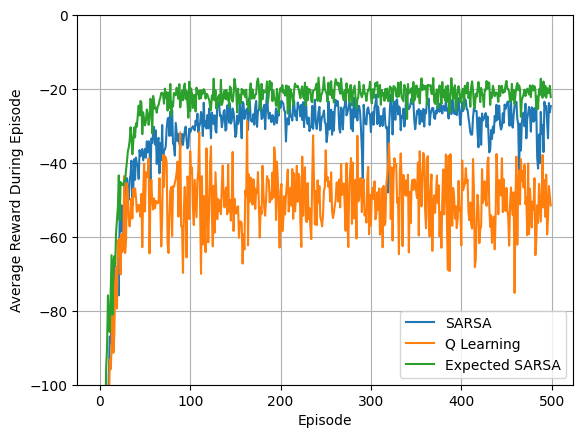

In [6]:
for idx, algo_rewards in enumerate(rewards_list):

  plt.plot(np.mean(algo_rewards, axis=1), label = algorithms[idx])

plt.xlabel("Episode")
plt.ylabel("Average Reward During Episode")
plt.ylim(-100,0)
plt.legend()
plt.grid()

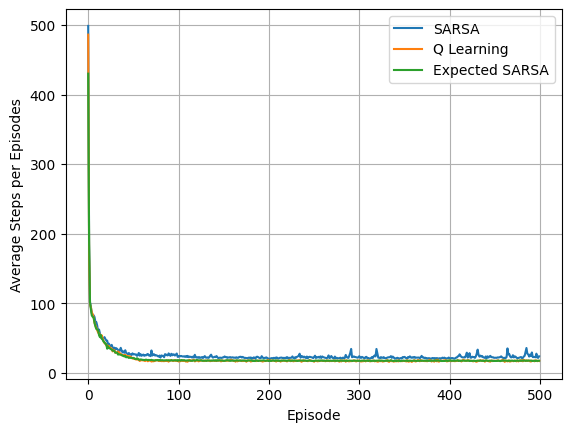

In [7]:
for idx, algo_steps in enumerate(steps_per_episode_list):

  plt.plot(np.mean(algo_steps, axis=1), label = algorithms[idx])

plt.xlabel("Episode")
plt.ylabel("Average Steps per Episodes")
plt.legend()
plt.grid()